#**Loan Approval Prediction System using Random Forest Classifier**

This system predicts whether a loan application should be approved or denied based on various applicant attributes and historical loan data.It looks at information about a person who wants a loan, like how much money they earn, educatonal background, if they paid back loans before etc. Then, it says if they can get the loan or not. This helps banks make choices about giving loans.

In order to develop this model, I have used Random Forest Classifier.

### **Importing the Libraries**

In [205]:
# Importing the necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### **Data Loading**

In [206]:
# loading the dataset to pandas DataFrame
loan_df = pd.read_csv('/content/sample_data/loan-prediction.csv')

### **Data Preprocessing**

In [207]:
# displays the number of rows and columns in the DataFrame 'loan_df'
loan_df.shape

(614, 13)

In [208]:
# Display the first 10 rows of the loan_df DataFrame
loan_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [209]:
# Display a summary of the dataFrame information
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [210]:
# statistical measures of the dataset
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [211]:
# check duplicate value in the dataset
loan_df.duplicated().sum()

0

There are no duplicate values in the dataset. Therefore next checked for null values.

In [212]:
# get number of missing values in each column
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

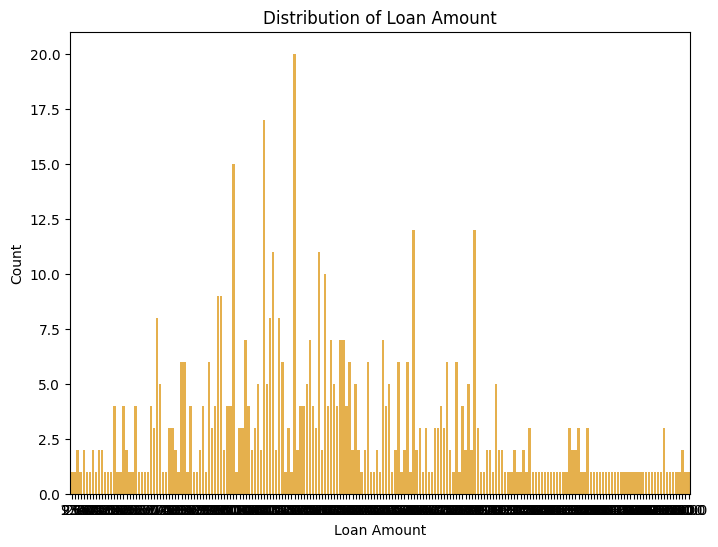

In [213]:
# Count the occurrences of each loan amount
LoanAmount_counts = loan_df['LoanAmount'].value_counts()

# Create a bar plot to show the distribution of loan amounts
plt.figure(figsize=(8,6))
sns.barplot(x=LoanAmount_counts.index, y=LoanAmount_counts.values,color='orange', alpha=0.8)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

Since the distibution is like normal distibution, I replaced missing values in the 'LoanAmount' column with the mean of loan amount.

In [214]:
# Fill missing values in the 'LoanAmount' column with the mean value
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(), inplace=True)

In [215]:
# get number of missing values in each column after replacing null values of 'LoanAmount' column with the mean value
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

After replacing null values of "Loan Amount" with the mean of that column, I dropped all other raws that has null values, instead of using mode. dropping null values increased the accuracy than replacing with mode.

In [216]:
# Remove rows with missing values from the DataFrame
loan_df = loan_df.dropna()

In [217]:
# get number of missing values in each column after dropping rows with null values
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [218]:
# displays the number of rows and columns in the DataFrame 'loan_df' after dropping null values
loan_df.shape

(499, 13)

In [219]:
# Count the occurrences of unique values in the 'Dependents' column
loan_df['Dependents'].value_counts()

0     284
2      88
1      84
3+     43
Name: Dependents, dtype: int64

In [220]:
# Replace '3+' with '4' in the 'Dependents' column
loan_df=loan_df.replace(to_replace='3+', value=4)

# Count the occurrences of unique values in the 'Dependents' column
loan_df['Dependents'].value_counts()

0    284
2     88
1     84
4     43
Name: Dependents, dtype: int64

In [221]:
# Replace values in the 'Loan_Status' column: 'N' with 0, 'Y' with 1
loan_df.replace({"Loan_Status":{'N':0,'Y':1}}, inplace=True)

### **Data Visualization**

In [222]:
# Define custom colors for graph
colors = {1: "green", 0: "red"}

<Axes: xlabel='Education', ylabel='count'>

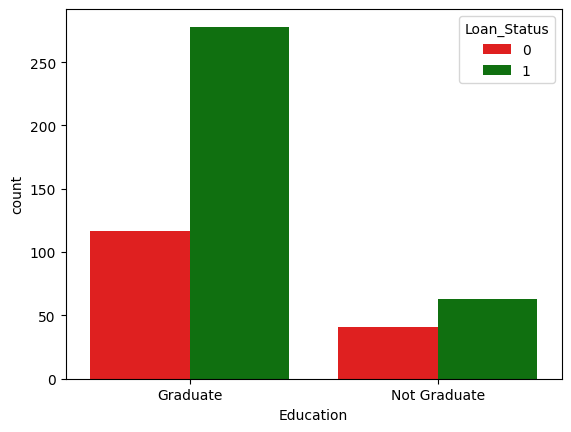

In [223]:
# Create a countplot to visualize the relationship between 'Education' and 'Loan_Status'
# It shows the count of loan approvals and denials based on the education level.
sns.countplot(x='Education', hue='Loan_Status', data=loan_df, palette=colors)


<Axes: xlabel='Married', ylabel='count'>

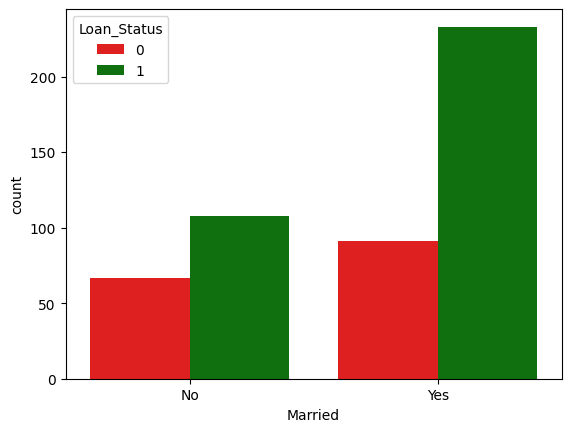

In [224]:
# Create a countplot to visualize the relationship between 'marital status' and 'Loan_Status'
# It shows the count of loan approvals and denials based on the marital status.
sns.countplot(x='Married', hue='Loan_Status', data=loan_df, palette=colors)


<Axes: xlabel='Dependents', ylabel='count'>

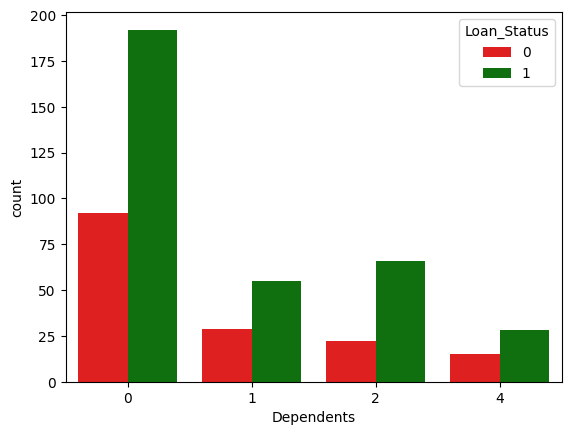

In [225]:
# Create a countplot to visualize the relationship between 'Dependents' and 'Loan_Status'
# It shows the count of loan approvals and denials based on the Dependents.
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_df, palette=colors)

<Axes: xlabel='Self_Employed', ylabel='count'>

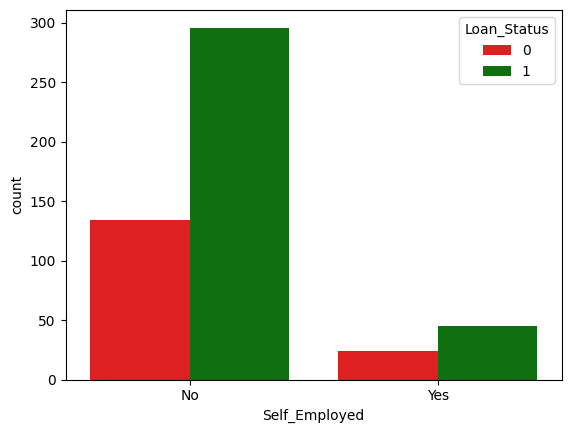

In [226]:
# Create a countplot to visualize the relationship between 'Self_Employed' and 'Loan_Status'
# It shows the count of loan approvals and denials based on the Self_Employed or not.
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_df, palette=colors)


<Axes: xlabel='Property_Area', ylabel='count'>

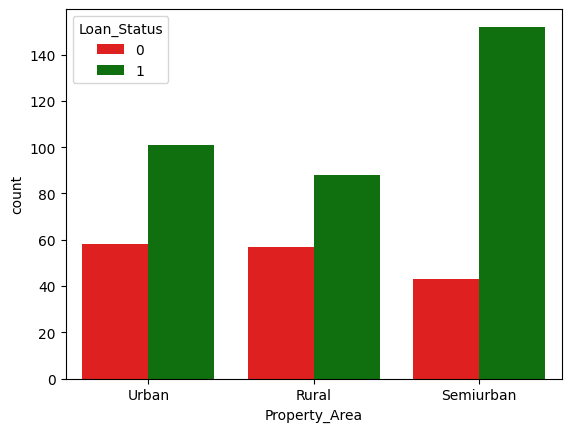

In [227]:
# Create a countplot to visualize the relationship between 'Property Area' and 'Loan_Status'
# It shows the count of loan approvals and denials based on the Property Area.
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_df, palette=colors)


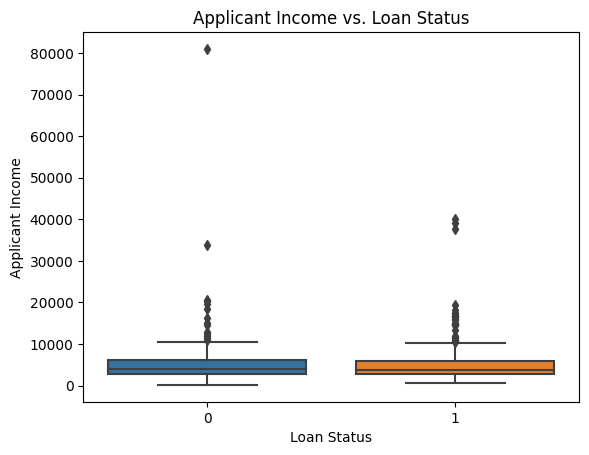

In [228]:
# Create a box plot to visualize the distribution of ApplicantIncome by Loan_Status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_df)

# Add labels and a title
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.title('Applicant Income vs. Loan Status')

# Show the plot
plt.show()

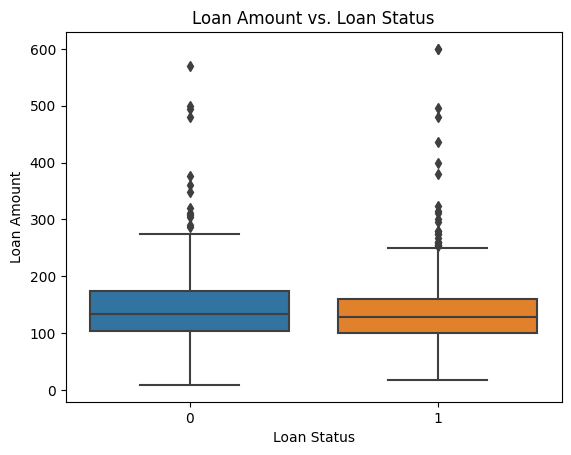

In [229]:
# Create a box plot to visualize the distribution of Loan Amount by Loan_Status
sns.boxplot(x='Loan_Status', y='LoanAmount', data=loan_df)

# Add labels and a title
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs. Loan Status')

# Show the plot
plt.show()

In [230]:
# convert categorical columns to numerical values
loan_df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [231]:
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### **Correlation Matrix**

<ipython-input-232-80d1aed0aa4f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_df.corr()


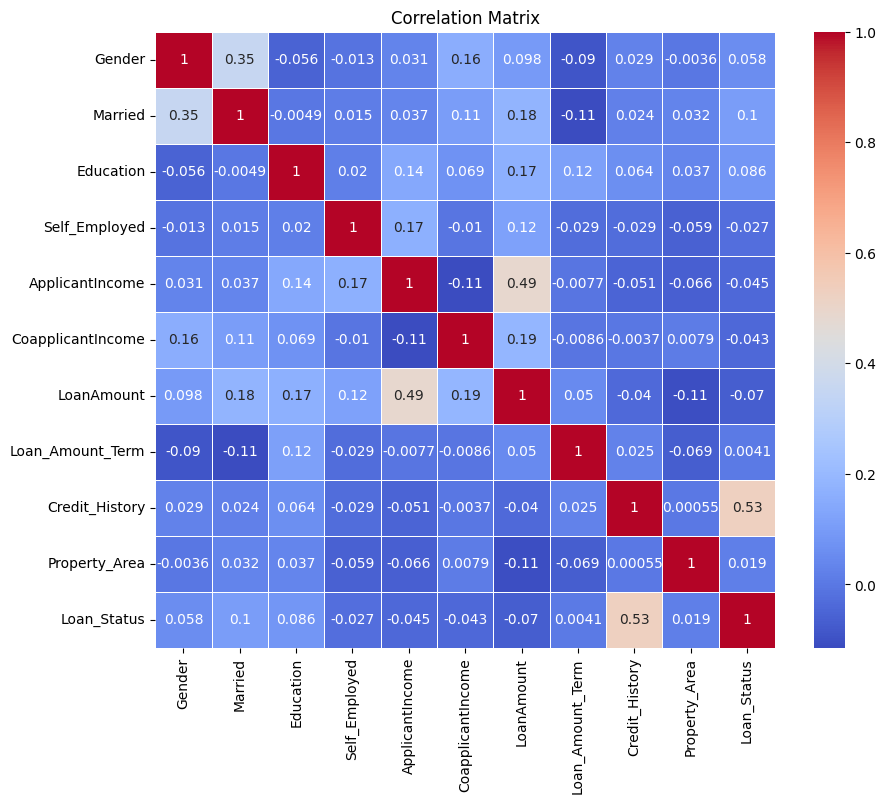

In [232]:
# Calculate the correlation matrix for the loan_df DataFrame
correlation_matrix = loan_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### **Select the Attributes for X and Y Variables**

In [233]:
# separating the data and label
X = loan_df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = loan_df['Loan_Status']

### **Split the Dataset**

In [234]:
# Split the dataset into training and testing sets
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [235]:
# Display the shapes of the original feature dataset, training dataset and testing dataset
print(X.shape, X_train.shape, X_test.shape)

(499, 11) (449, 11) (50, 11)


### **Train the Model using Random Forest Classifier**

In [236]:
# Create and train a Random Forest Classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

### **Model Evaluation**

In [237]:
# Predict the labels on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.62      0.69        16
           1       0.84      0.91      0.87        34

    accuracy                           0.82        50
   macro avg       0.80      0.77      0.78        50
weighted avg       0.82      0.82      0.81        50



### **Making a Predictive System**

In [238]:
# Prepare new input data
new_data = pd.DataFrame({
    'Gender': ['Female'],
    'Married': ['Yes'],
    'Dependents': [1],
    'Education': ['Graduate'],
    'Self_Employed': ['No'],
    'ApplicantIncome': [5000],
    'CoapplicantIncome': [10],
    'LoanAmount': [150],
    'Loan_Amount_Term': [360],
    'Credit_History': [1],
    'Property_Area': ['Rural']
})

# Preprocess the input data
def preprocess_data(data):
    data.fillna(0, inplace=True)  # Replace missing values with 0
    data = data.replace(to_replace='3+', value=4)  # Replace '3+' with 4 in the 'Dependents' column
    data.replace({'Married': {'No': 0, 'Yes': 1}, 'Gender': {'Male': 1, 'Female': 0}, 'Self_Employed': {'No': 0, 'Yes': 1},
                  'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, 'Education': {'Graduate': 1, 'Not Graduate': 0}}, inplace=True)
    return data

new_data = preprocess_data(new_data)  # Apply preprocessing to the new data

# Make predictions on the new data
predictions = classifier.predict(new_data)

# Convert the predictions to human-readable values
predictions = ['Approved' if p == 1 else 'Denied' for p in predictions]

# Print the prediction
print("Loan Status Prediction:", predictions[0])



Loan Status Prediction: Approved
